In [1]:
from ddsapi import Client
import numpy as np
from geokube import AxisType, CoordType, Domain, RegularLatLon
from geokube.core.abstract.coordinate import Coordinate

In [2]:
dataset = 'era5-downscaled-over-italy'
request = {
    "product_type": "VHR-REA_IT_1989_2020_hourly",
    "time": { "year": "2009",  "hour":  "16", "month": "5", "day": "29" },
    "variable": "min_air_temperature",
    "format": "netcdf"
}

In [3]:
dcube = Client(quiet=True).retrieve(dataset, request)

/home/ms/anaconda3/envs/ms-hpc/lib/python3.9/site-packages/geokube-1.0.0b1-py3.9.egg/geokube/core/field.py:111: RuntimeWarning: All-NaN axis encountered


In [4]:
temperature = dcube['min_air_temperature']

In [5]:
lat_step, lon_step = 0.1, 0.1
coord = temperature.domain.coordinate
lat, lon = coord('lat').values, coord('lon').values

target_domain = Domain(
    coordinates=[
        Coordinate(
            dims=('latitude',),
            data=np.arange(lat.min(), lat.max() + 0.5 * lat_step, lat_step),
            name='latitude',
            coord_type=CoordType.DIMENSION,
            axis_type=AxisType.LATITUDE
        ),
        Coordinate(
            data=np.arange(lon.min(), lon.max() + 0.5 * lon_step, lon_step),
            dims=('longitude',),
            name='longitude',
            coord_type=CoordType.DIMENSION,
            axis_type=AxisType.LONGITUDE
        )
    ],
    crs=RegularLatLon()
)

In [6]:
t_regrid = temperature.regrid( target_domain )

/home/ms/anaconda3/envs/ms-hpc/lib/python3.9/site-packages/geokube-1.0.0b1-py3.9.egg/geokube/core/field.py:111: RuntimeWarning: All-NaN axis encountered


In [7]:
#t_regrid.to_dict()

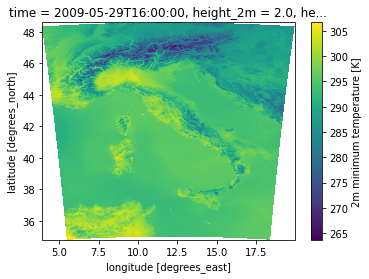

In [8]:
temperature.plot()

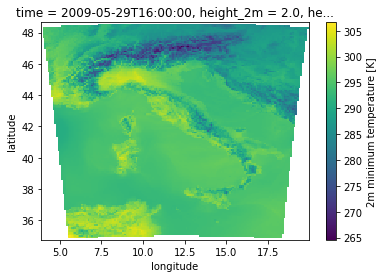

In [9]:
t_regrid.plot()